In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | huarmey
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | glendive
Processing Record 16 of Set 1 | kulunda
Processing Record 17 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | cape town
Processing Record

Processing Record 35 of Set 4 | ganzhou
Processing Record 36 of Set 4 | chuy
Processing Record 37 of Set 4 | perth
Processing Record 38 of Set 4 | bauchi
Processing Record 39 of Set 4 | kaka
Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | khash
Processing Record 45 of Set 4 | goure
Processing Record 46 of Set 4 | chagda
City not found. Skipping...
Processing Record 47 of Set 4 | cuervos
Processing Record 48 of Set 4 | arlit
Processing Record 49 of Set 4 | harper
Processing Record 50 of Set 4 | kalmunai
Processing Record 1 of Set 5 | mendahara
City not found. Skipping...
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | klaksvik
Processing Record 4 of Set 5 | beringovskiy
Processing Record 5 of Set 5 | barsovo
Processing Record 6 of Set 5 | sorong
Processing Record 7 of Set 5 | tomari
Processing Record 8 of Set 5 | ponta 

Processing Record 27 of Set 8 | iskateley
Processing Record 28 of Set 8 | lake cowichan
Processing Record 29 of Set 8 | meulaboh
Processing Record 30 of Set 8 | acapulco
Processing Record 31 of Set 8 | barmer
Processing Record 32 of Set 8 | sumbe
Processing Record 33 of Set 8 | moindou
Processing Record 34 of Set 8 | yarada
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | nyurba
Processing Record 37 of Set 8 | new waterford
Processing Record 38 of Set 8 | vostok
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | kangaatsiaq
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | purranque
Processing Record 43 of Set 8 | kjollefjord
Processing Record 44 of Set 8 | nago
Processing Record 45 of Set 8 | itarema
Processing Record 46 of Set 8 | atambua
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | grand centre
City not found. Skipping...
Processing Record 49 of Set 8 |

Processing Record 14 of Set 12 | impfondo
Processing Record 15 of Set 12 | loikaw
Processing Record 16 of Set 12 | doha
Processing Record 17 of Set 12 | port hedland
Processing Record 18 of Set 12 | husavik
Processing Record 19 of Set 12 | charters towers
Processing Record 20 of Set 12 | santa rosa
Processing Record 21 of Set 12 | saint anthony
Processing Record 22 of Set 12 | prince rupert
Processing Record 23 of Set 12 | nyagan
Processing Record 24 of Set 12 | soyo
Processing Record 25 of Set 12 | senanga
Processing Record 26 of Set 12 | haines junction
Processing Record 27 of Set 12 | tynda
Processing Record 28 of Set 12 | khandyga
Processing Record 29 of Set 12 | karamea
City not found. Skipping...
Processing Record 30 of Set 12 | borgarnes
Processing Record 31 of Set 12 | pangoa
Processing Record 32 of Set 12 | rio grande
Processing Record 33 of Set 12 | santa cruz de la palma
Processing Record 34 of Set 12 | juntas
Processing Record 35 of Set 12 | ribeirao branco
Processing Recor

In [29]:
len(city_data)

561

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.34,79,0,17.81,KI,2021-03-03 01:54:38
1,Huarmey,-10.0681,-78.1522,75.00,70,100,7.07,PE,2021-03-03 01:53:55
2,Airai,-8.9266,125.4092,72.23,71,100,3.04,TL,2021-03-03 01:51:50
3,New Norfolk,-42.7826,147.0587,62.01,57,100,4.00,AU,2021-03-03 01:54:39
4,Grand Gaube,-20.0064,57.6608,75.00,83,14,3.00,MU,2021-03-03 01:54:39
5,Fortuna,40.5982,-124.1573,53.01,77,46,4.43,US,2021-03-03 01:51:12
6,Kaitangata,-46.2817,169.8464,71.71,46,0,2.95,NZ,2021-03-03 01:54:39
7,Kodiak,57.7900,-152.4072,35.60,69,90,5.75,US,2021-03-03 01:52:54
8,Avarua,-21.2078,-159.7750,82.40,78,75,6.91,CK,2021-03-03 01:51:20
9,Port Elizabeth,-33.9180,25.5701,68.00,94,20,9.22,ZA,2021-03-03 01:54:40


In [31]:
# Reorder the columns
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-03-03 01:54:38,3.0707,172.7902,81.34,79,0,17.81
1,Huarmey,PE,2021-03-03 01:53:55,-10.0681,-78.1522,75.00,70,100,7.07
2,Airai,TL,2021-03-03 01:51:50,-8.9266,125.4092,72.23,71,100,3.04
3,New Norfolk,AU,2021-03-03 01:54:39,-42.7826,147.0587,62.01,57,100,4.00
4,Grand Gaube,MU,2021-03-03 01:54:39,-20.0064,57.6608,75.00,83,14,3.00
5,Fortuna,US,2021-03-03 01:51:12,40.5982,-124.1573,53.01,77,46,4.43
6,Kaitangata,NZ,2021-03-03 01:54:39,-46.2817,169.8464,71.71,46,0,2.95
7,Kodiak,US,2021-03-03 01:52:54,57.7900,-152.4072,35.60,69,90,5.75
8,Avarua,CK,2021-03-03 01:51:20,-21.2078,-159.7750,82.40,78,75,6.91
9,Port Elizabeth,ZA,2021-03-03 01:54:40,-33.9180,25.5701,68.00,94,20,9.22


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

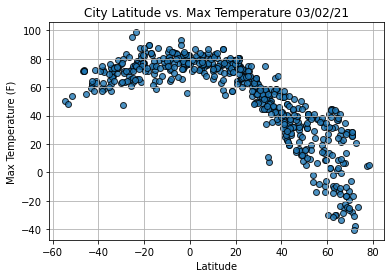

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

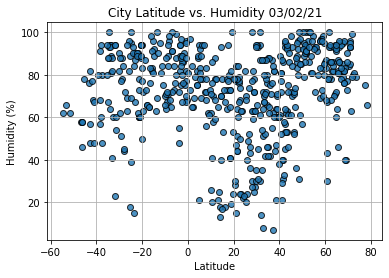

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

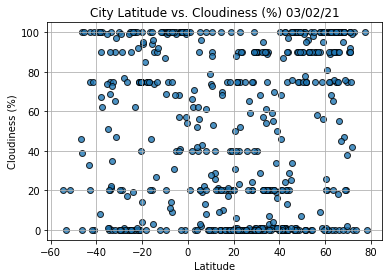

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

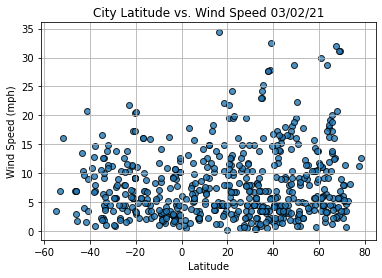

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()